## Web scraping on Radletters Blog using Beautifulsoup

### Project Overview

In this web scrapping project i am going to scrape radletters blog using `beautifulsoup`.

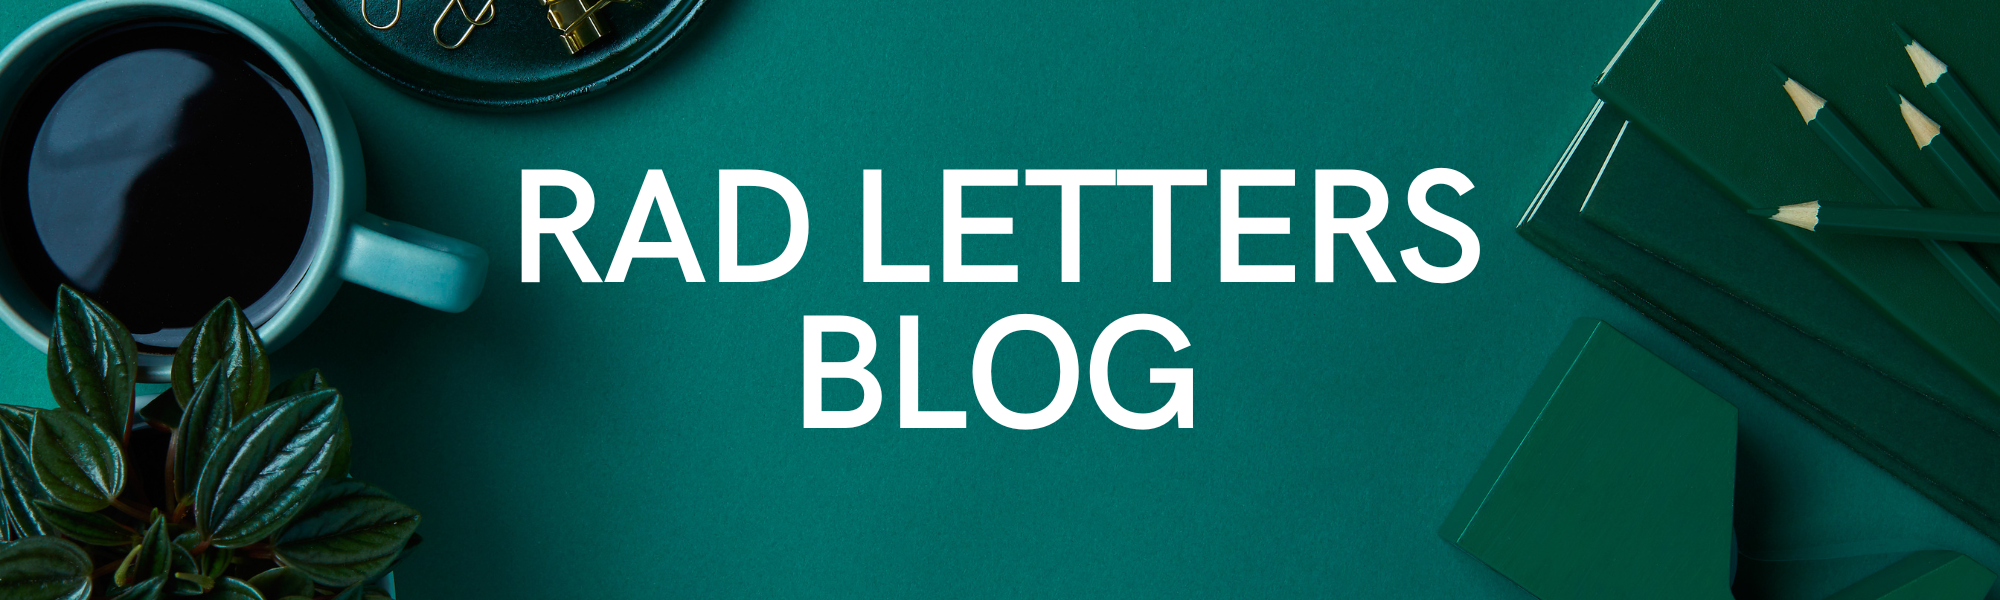

Here is the website link of the [radletters](https://www.radletters.com/)
The entire coding part is done using `python`.
The libraries i used in this project are 
- **Requests**
- **BeautifulSoup**
- **Pandas**
- **os**

Ok...then 
what i have scaped from this blog is mentioned below...
- Scraping Topics Title and url from Radletters blog
- Scraping Newsletters info from all the pages in the blog
- Scraping Newsletter info from each topic

### Scraping Topics Title and url from Radletters blog

In [37]:
# Importing required libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import os

# Defining topics info function
def Topics_info(path):
    url = 'https://www.radletters.com/'
    
    # Retrieving url from the requests library
    response = requests.get(url)
    
    # Checking whether the status code is 200 and if not raising an exception
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(url))
    Topics_soup = bs(response.text,'html.parser')
    
    # scraping topic names using topic class and appending it to the topic names list
    Topics_class = 'block appearance-none w-full bg-gray-200 border border-gray-200 text-gray-700 py-3 px-4 pr-8 rounded leading-tight focus:outline-none focus:bg-white focus:border-gray-500'
    Topics = Topics_soup.find('select',{'class' : Topics_class}).find_all('option')
    Topic_names = []
    for topic in Topics:
        Topic_names.append(topic.text)
        
    # scraping topic urls of each topic and appending it to the topic url list
    base_url = 'https://www.radletters.com/' + '?tag='
    Topic_url = []
    for i in range(len(Topic_names)):
        Topic_url.append(base_url + Topic_names[i])
        
    # Creating a topics dictonary containing both the topic names and topic urls
    Topics_dict = {
    'Topic names' : Topic_names,
    'url' : Topic_url
    }
    
    # creating a topics dataframe using topics dictonary
    Topics_df = pd.DataFrame(Topics_dict)
    return Topics_df

# calling topics info function with passing path to arguments to upload the contents of dataframe to a topics info csv file
Topics_info(Topics_df.to_csv('Topics Info.csv'))

,Topic names,url
0,All Topics,https://www.radletters.com/?tag=All Topics
1,Arts,https://www.radletters.com/?tag=Arts
2,Business,https://www.radletters.com/?tag=Business
3,Communities & Networks,https://www.radletters.com/?tag=Communities & ...
4,Copywriting,https://www.radletters.com/?tag=Copywriting
5,Creativity,https://www.radletters.com/?tag=Creativity
6,Crypto,https://www.radletters.com/?tag=Crypto
7,Culture,https://www.radletters.com/?tag=Culture
8,Cybersecurity,https://www.radletters.com/?tag=Cybersecurity
9,Data,https://www.radletters.com/?tag=Data


### Scraping Newsletters info from all the pages in the blog

In [20]:
page1_url = 'https://www.radletters.com/'

No_of_pages_in_radletters = 48
page_urls = []
for i in range(No_of_pages_in_radletters):
    if i == 0:
        main_url = page1_url
    else :
        main_url = f'https://www.radletters.com/?page={i}&tag='
    page_urls.append(main_url)

In [7]:
# Importing required libraries

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Creating an empty dataframe to append all the pages dataframes to this empty dataframe
Empty_df = pd.DataFrame({
        'Newsletter Title' : [],
        'Description' : [],
        'Url' : [],
        'Topic Tags' : []
    })

def scrapping_newsletter_blog(page_url):
    
    # Retrieving page url using requests library
    response = requests.get(page_url)
    #Using Beautifulsoup for parsing
    soup = bs(response.text,'html.parser')

    # Retriving newsletter names from each page
    newsletter_class = 'md:mt-2 mt-1 align-text-bottom inline-block font-semibold cursor-text'
    newsletter_title = soup.find_all('div',newsletter_class)
    newsletter_title_list = []
    for title in newsletter_title:
        newsletter_title_list.append(title.text.strip())

    # Retrieving newsletter description of each newsletter
    newsletter_desc_class = 'flex justify-center text-sm text-gray-600'
    newsletter_description = soup.find_all('div',{'class' : newsletter_desc_class})
    newsletter_description_list = []
    for desc in newsletter_description:
        newsletter_description_list.append(desc.text.strip())

    # Retrieving url of each newsletter
    newsletter_url_class = 'flex justify-center mx-8 mt-3'
    newsletter_url = soup.find_all('div',{'class' : newsletter_url_class})
    newsletter_url_list = []
    for url in newsletter_url:
        newsletter_url_list.append(url.a['href'])

    # Retrieving topic tags of each news letter    
    newsletter_topic_tags_class = 'md:mt-2 mt-1 flex flex-wrap justify-center'
    newsletter_topic_tags_class_2 = 'inline-flex text-sm hover:bg-gray-100 text-gray-700 rounded-full px-3 my-1 mx-1 h-6 border border-gray-200 shadow cursor-pointer'
    newsletter_topic_tags = soup.find_all('div',{'class' : newsletter_topic_tags_class})
    newsletter_topic_tags_list = []
    for topic_tags in newsletter_topic_tags:
        newsletter_topic_tags_list.append(topic_tags.text.replace('\n','').rstrip().lstrip().replace('            ',','))
    
    # creating dictonary to create a dataframe
    dict = {
    'Newsletter Title' : newsletter_title_list,
    'Description' : newsletter_description_list,
    'url' : newsletter_url_list,
    'Topic Tags' : newsletter_topic_tags_list
    }
    # Creating  a Dataframe using dictonary
    pages_df = pd.DataFrame(dict)

    return pages_df

# Scraping each page in the page urls and appending info of each page dataframe into the empty dataframe
for page in page_urls:
    Empty_df = Empty_df.append(scrapping_newsletter_blog(page),ignore_index = True)

# Uploading dataframe in the form of a csv file
Empty_df.to_csv('Newsletters from all pages.csv')

/tmp/ipykernel_587/1367062604.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Empty_df = Empty_df.append(scrapping_newsletter_blog(page),ignore_index = True)


In [30]:
# No. of the rows and columns in a empty dataframe using shape attribute
Empty_df.shape

(1410, 5)

### Scraping Newsletter info from each topic

In [64]:
%%time

def scrapping_newsletter_blog(Topic_url):
    
    response = requests.get(Topic_url)
    soup = bs(response.text,'html.parser')

    # Retriving newsletter names from each page
    newsletter_class = 'md:mt-2 mt-1 align-text-bottom inline-block font-semibold cursor-text'
    newsletter_title = soup.find_all('div',newsletter_class)
    newsletter_title_list = []
    for title in newsletter_title:
        newsletter_title_list.append(title.text.strip())

    # Retrieving newsletter description of each newsletter
    newsletter_desc_class = 'flex justify-center text-sm text-gray-600'
    newsletter_description = soup.find_all('div',{'class' : newsletter_desc_class})
    newsletter_description_list = []
    for desc in newsletter_description:
        newsletter_description_list.append(desc.text.strip())

    # Retrieving url of each newsletter
    newsletter_url_class = 'flex justify-center mx-8 mt-3'
    newsletter_url = soup.find_all('div',{'class' : newsletter_url_class})
    newsletter_url_list = []
    for url in newsletter_url:
        newsletter_url_list.append(url.a['href'])

    # Retrieving topic tags of each news letter    
    newsletter_topic_tags_class = 'md:mt-2 mt-1 flex flex-wrap justify-center'
    newsletter_topic_tags_class_2 = 'inline-flex text-sm hover:bg-gray-100 text-gray-700 rounded-full px-3 my-1 mx-1 h-6 border border-gray-200 shadow cursor-pointer'
    newsletter_topic_tags = soup.find_all('div',{'class' : newsletter_topic_tags_class})
    newsletter_topic_tags_list = []
    for topic_tags in newsletter_topic_tags:
        newsletter_topic_tags_list.append(topic_tags.text.replace('\n','').rstrip().lstrip().replace('            ',','))
    
    # Creating dictionary of the each tag
    dict_2 = {
    'Newsletter Title' : newsletter_title_list,
    'Description' : newsletter_description_list,
    'url' : newsletter_url_list,
    'Topic Tags' : newsletter_topic_tags_list
    }
    # creating dataframe using dictionary 
    pages_df = pd.DataFrame(dict_2)

    return pages_df

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 21.5 µs


In [70]:
# Creating directory in a local computer using makedirs
os.makedirs('Topics',exist_ok = True)

# scraping each topic in the blog by taking url as an argument and storing the each topic csv file into the created directory
for index,row in Topics_df.iterrows():
    df = scrapping_newsletter_blog(row['url'])
    df.to_csv('Topics/{}.csv'.format(row['Topic names']))